In [5]:
import requests
import pandas as pd

from lxml import etree

html = 'https://ncov.dxy.cn/ncovh5/view/pneumonia'
html_data = requests.get(html)
html_data.encoding = 'utf-8'
html_data = etree.HTML(html_data.text, etree.HTMLParser())
html_data = html_data.xpath(
    '//*[@id="getListByCountryTypeService2true"]/text()')  # xpath方法选择疫情的数据集合
ncov_world = html_data[0][49:-12]
ncov_world = ncov_world.replace('true', 'True')
ncov_world = ncov_world.replace('false', 'False')
ncov_world = eval(ncov_world)

country = []
confirmed = []
lived = []
dead = []

for i in ncov_world:  # 分离国家名称，确诊人数，治愈人数和死亡人数并存入dataframe里备用
    country.append(i['provinceName'])
    confirmed.append(i['confirmedCount'])
    lived.append(i['curedCount'])
    dead.append(i['deadCount'])
    
data_world = pd.DataFrame()
data_world['国家名称'] = country
data_world['确诊人数'] = confirmed
data_world['治愈人数'] = lived
data_world['死亡人数'] = dead
data_world.head(5)

,国家名称,确诊人数,治愈人数,死亡人数
0,法国,29583616,368023,149044
1,德国,26200663,4328400,138781
2,韩国,18053287,336548,24103
3,英国,22455392,6491069,178880
4,西班牙,12311477,150376,106105


In [6]:
data_economy = pd.read_csv(
    "https://labfile.oss.aliyuncs.com/courses/2791/gpd_2016_2020.csv", index_col=0)
time_index = pd.date_range(start='2016', periods=18, freq='Q')
data_economy.index = time_index
data_economy

,国内生产总值,第一产业增加值,第二产业增加值,第三产业增加值,农林牧渔业增加值,工业增加值,制造业增加值,建筑业增加值,批发和零售业增加值,交通运输、仓储和邮政业增加值,住宿和餐饮业增加值,金融业增加值,房地产业增加值,信息传输、软件和信息技术服务业增加值,租赁和商务服务业增加值,其他行业增加值
2016-03-31,162410.0,8312.7,61106.8,92990.5,8665.5,53666.4,45784.0,7763.0,16847.5,7180.5,3181.6,15340.4,11283.0,5128.8,4985.3,28368.1
2016-06-30,181408.2,12555.9,73416.5,95435.8,13045.5,60839.2,52378.3,12943.8,17679.8,8295.0,3112.3,14811.7,12209.7,5130.7,5075.1,28265.4
2016-09-30,191010.6,17542.4,75400.5,98067.8,18162.2,61902.5,52468.3,13870.6,18513.0,8591.6,3473.2,14945.4,12615.3,4662.3,5452.4,28822.1
2016-12-31,211566.2,21728.2,85504.1,104334.0,22577.8,68998.4,58878.4,16921.5,20684.1,8961.6,3840.7,14866.4,13861.4,5202.3,6015.8,29636.1
2017-03-31,181867.7,8205.9,69315.5,104346.3,8595.8,60909.3,51419.7,8725.3,18608.9,8094.5,3536.5,16758.8,13047.0,5915.2,5811.9,31864.3
2017-06-30,201950.3,12644.9,82323.0,106982.4,13204.2,68099.8,58172.1,14574.4,19473.6,9397.7,3440.9,15856.3,14059.0,5977.9,5868.4,31998.1
2017-09-30,212789.3,18255.8,84574.1,109959.5,18944.2,69327.2,58632.6,15590.1,20342.9,9688.7,3838.5,16290.4,14054.9,5539.8,6464.6,32708.0
2017-12-31,235428.7,22992.9,95368.0,117067.8,23915.8,76782.9,65652.1,19015.8,22731.1,9940.9,4240.1,15938.8,15925.1,6376.0,7128.4,33433.7
2018-03-31,202035.7,8575.7,76598.2,116861.8,9005.8,66905.6,56631.9,10073.8,20485.5,8806.5,3887.8,18050.6,14863.5,7212.2,6879.5,35864.9
2018-06-30,223962.2,13003.8,91100.6,119857.8,13662.2,75122.1,64294.9,16404.3,21374.2,10174.9,3779.6,17401.0,16176.1,7309.6,6885.3,35673.1


In [7]:
data_area = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/2791/DXYArea.csv')
data_news = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/2791/DXYNews.csv')

In [8]:
data_area = data_area.loc[data_area['countryName'] == data_area['provinceName']]
data_area_times = data_area[['countryName', 'province_confirmedCount',
                             'province_curedCount', 'province_deadCount', 'updateTime']]

time = pd.DatetimeIndex(data_area_times['updateTime'])  # 根据疫情的更新时间来生成时间序列
data_area_times.index = time  # 生成索引
data_area_times = data_area_times.drop('updateTime', axis=1)
data_area_times.head(5)

data_area_times.isnull().any()  # 查询是否有空值

countryName                False
province_confirmedCount    False
province_curedCount        False
province_deadCount         False
dtype: bool

In [9]:
data_news_times = data_news[['pubDate', 'title', 'summary']]
time = pd.DatetimeIndex(data_news_times['pubDate'])
data_news_times.index = time  # 生成新闻数据的时间索引
data_news_times = data_news_times.drop('pubDate', axis=1)
data_news_times.head(5)

,title,summary
pubDate,,
2020-07-17 05:40:08,美国新增71434例新冠肺炎确诊病例，累计确诊超354万例,据美国约翰斯·霍普金斯大学统计数据显示，截至美东时间7月16日17:33时（北京时间17日0...
2020-07-17 06:06:49,巴西新冠肺炎确诊病例破201万，近六成大城市确诊病例加速增长,截至当地时间7月16日18时，巴西新增新冠肺炎确诊病例45403例，累计确诊2012151例...
2020-07-16 22:31:00,阿塞拜疆新增493例新冠肺炎确诊病例 累计确诊26165例,当地时间7月16日，阿塞拜疆国家疫情防控指挥部发布消息，在过去24小时内，阿塞拜疆新增新冠肺...
2020-07-16 22:29:48,​科威特新增791例新冠肺炎确诊病例 累计确诊57668例,科威特卫生部当地时间16日下午发布通告，确认过去24小时境内新增791例新冠肺炎确诊病例，同...
2020-07-16 21:26:54,罗马尼亚新增777例新冠肺炎确诊病例 累计确诊35003例,据罗马尼亚政府7月16日公布的数据，过去24小时对19097人进行新冠病毒检测，确诊777例...


In [10]:
print(data_world.isnull().any())
print(data_economy.isnull().any())
print(data_area_times.isnull().any())
print(data_news_times.isnull().any())  # 确认各个数据集是否空集

国家名称    False
确诊人数    False
治愈人数    False
死亡人数    False
dtype: bool
国内生产总值                False
第一产业增加值               False
第二产业增加值               False
第三产业增加值               False
农林牧渔业增加值              False
工业增加值                 False
制造业增加值                False
建筑业增加值                False
批发和零售业增加值             False
交通运输、仓储和邮政业增加值        False
住宿和餐饮业增加值             False
金融业增加值                False
房地产业增加值               False
信息传输、软件和信息技术服务业增加值    False
租赁和商务服务业增加值           False
其他行业增加值               False
dtype: bool
countryName                False
province_confirmedCount    False
province_curedCount        False
province_deadCount         False
dtype: bool
title      False
summary    False
dtype: bool


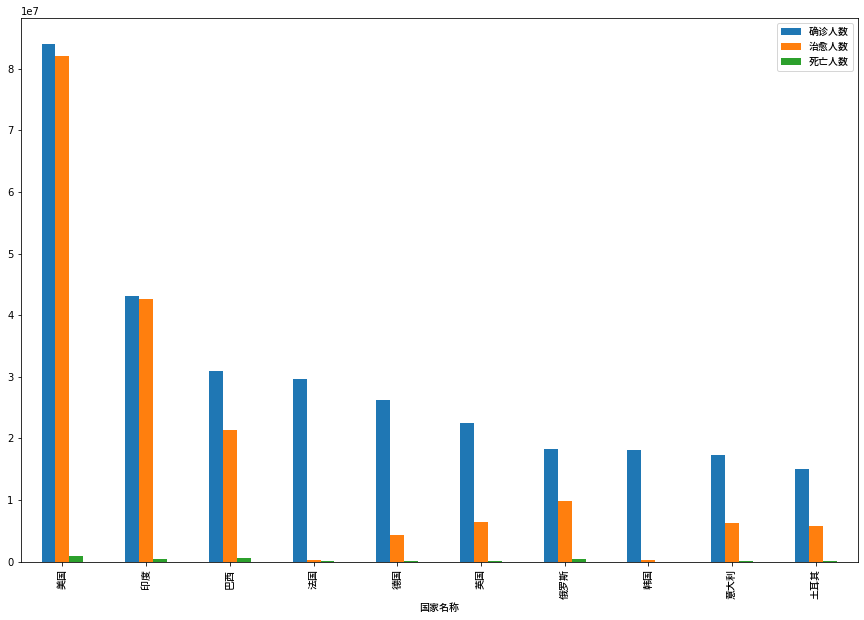

In [11]:
import matplotlib.pyplot as plt
import matplotlib
import os

%matplotlib inline
# 指定中文字体
fpath = os.path.join("./NotoSansCJK.otf")
myfont = matplotlib.font_manager.FontProperties(fname=fpath)
# 绘图
data_world = data_world.sort_values(by='确诊人数', ascending=False)  # 按确诊人数进行排序
data_world_set = data_world[['确诊人数', '治愈人数', '死亡人数']]
data_world_set.index = data_world['国家名称']
data_world_set.head(10).plot(kind='bar', figsize=(15, 10))  # 对排序前十的国家数据进行绘图
plt.xlabel('国家名称', fontproperties=myfont)
plt.xticks(fontproperties=myfont)
plt.legend(fontsize=30, prop=myfont)  # 设置图例

In [12]:
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.globals import CurrentConfig, NotebookType

CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK
name_map = {  # 世界各国数据的中英文对比
    'Singapore Rep.': '新加坡',
    'Dominican Rep.': '多米尼加',
    'Palestine': '巴勒斯坦',
    'Bahamas': '巴哈马',
    'Timor-Leste': '东帝汶',
    'Afghanistan': '阿富汗',
    'Guinea-Bissau': '几内亚比绍',
    "Côte d'Ivoire": '科特迪瓦',
    'Siachen Glacier': '锡亚琴冰川',
    "Br. Indian Ocean Ter.": '英属印度洋领土',
    'Angola': '安哥拉',
    'Albania': '阿尔巴尼亚',
    'United Arab Emirates': '阿联酋',
    'Argentina': '阿根廷',
    'Armenia': '亚美尼亚',
    'French Southern and Antarctic Lands': '法属南半球和南极领地',
    'Australia': '澳大利亚',
    'Austria': '奥地利',
    'Azerbaijan': '阿塞拜疆',
    'Burundi': '布隆迪',
    'Belgium': '比利时',
    'Benin': '贝宁',
    'Burkina Faso': '布基纳法索',
    'Bangladesh': '孟加拉国',
    'Bulgaria': '保加利亚',
    'The Bahamas': '巴哈马',
    'Bosnia and Herz.': '波斯尼亚和黑塞哥维那',
    'Belarus': '白俄罗斯',
    'Belize': '伯利兹',
    'Bermuda': '百慕大',
    'Bolivia': '玻利维亚',
    'Brazil': '巴西',
    'Brunei': '文莱',
    'Bhutan': '不丹',
    'Botswana': '博茨瓦纳',
    'Central African Rep.': '中非',
    'Canada': '加拿大',
    'Switzerland': '瑞士',
    'Chile': '智利',
    'China': '中国',
    'Ivory Coast': '象牙海岸',
    'Cameroon': '喀麦隆',
    'Dem. Rep. Congo': '刚果民主共和国',
    'Congo': '刚果',
    'Colombia': '哥伦比亚',
    'Costa Rica': '哥斯达黎加',
    'Cuba': '古巴',
    'N. Cyprus': '北塞浦路斯',
    'Cyprus': '塞浦路斯',
    'Czech Rep.': '捷克',
    'Germany': '德国',
    'Djibouti': '吉布提',
    'Denmark': '丹麦',
    'Algeria': '阿尔及利亚',
    'Ecuador': '厄瓜多尔',
    'Egypt': '埃及',
    'Eritrea': '厄立特里亚',
    'Spain': '西班牙',
    'Estonia': '爱沙尼亚',
    'Ethiopia': '埃塞俄比亚',
    'Finland': '芬兰',
    'Fiji': '斐',
    'Falkland Islands': '福克兰群岛',
    'France': '法国',
    'Gabon': '加蓬',
    'United Kingdom': '英国',
    'Georgia': '格鲁吉亚',
    'Ghana': '加纳',
    'Guinea': '几内亚',
    'Gambia': '冈比亚',
    'Guinea Bissau': '几内亚比绍',
    'Eq. Guinea': '赤道几内亚',
    'Greece': '希腊',
    'Greenland': '格陵兰',
    'Guatemala': '危地马拉',
    'French Guiana': '法属圭亚那',
    'Guyana': '圭亚那',
    'Honduras': '洪都拉斯',
    'Croatia': '克罗地亚',
    'Haiti': '海地',
    'Hungary': '匈牙利',
    'Indonesia': '印度尼西亚',
    'India': '印度',
    'Ireland': '爱尔兰',
    'Iran': '伊朗',
    'Iraq': '伊拉克',
    'Iceland': '冰岛',
    'Israel': '以色列',
    'Italy': '意大利',
    'Jamaica': '牙买加',
    'Jordan': '约旦',
    'Japan': '日本',
    'Kazakhstan': '哈萨克斯坦',
    'Kenya': '肯尼亚',
    'Kyrgyzstan': '吉尔吉斯斯坦',
    'Cambodia': '柬埔寨',
    'Korea': '韩国',
    'Kosovo': '科索沃',
    'Kuwait': '科威特',
    'Lao PDR': '老挝',
    'Lebanon': '黎巴嫩',
    'Liberia': '利比里亚',
    'Libya': '利比亚',
    'Sri Lanka': '斯里兰卡',
    'Lesotho': '莱索托',
    'Lithuania': '立陶宛',
    'Luxembourg': '卢森堡',
    'Latvia': '拉脱维亚',
    'Morocco': '摩洛哥',
    'Moldova': '摩尔多瓦',
    'Madagascar': '马达加斯加',
    'Mexico': '墨西哥',
    'Macedonia': '马其顿',
    'Mali': '马里',
    'Myanmar': '缅甸',
    'Montenegro': '黑山',
    'Mongolia': '蒙古',
    'Mozambique': '莫桑比克',
    'Mauritania': '毛里塔尼亚',
    'Malawi': '马拉维',
    'Malaysia': '马来西亚',
    'Namibia': '纳米比亚',
    'New Caledonia': '新喀里多尼亚',
    'Niger': '尼日尔',
    'Nigeria': '尼日利亚',
    'Nicaragua': '尼加拉瓜',
    'Netherlands': '荷兰',
    'Norway': '挪威',
    'Nepal': '尼泊尔',
    'New Zealand': '新西兰',
    'Oman': '阿曼',
    'Pakistan': '巴基斯坦',
    'Panama': '巴拿马',
    'Peru': '秘鲁',
    'Philippines': '菲律宾',
    'Papua New Guinea': '巴布亚新几内亚',
    'Poland': '波兰',
    'Puerto Rico': '波多黎各',
    'Dem. Rep. Korea': '朝鲜',
    'Portugal': '葡萄牙',
    'Paraguay': '巴拉圭',
    'Qatar': '卡塔尔',
    'Romania': '罗马尼亚',
    'Russia': '俄罗斯',
    'Rwanda': '卢旺达',
    'W. Sahara': '西撒哈拉',
    'Saudi Arabia': '沙特阿拉伯',
    'Sudan': '苏丹',
    'S. Sudan': '南苏丹',
    'Senegal': '塞内加尔',
    'Solomon Is.': '所罗门群岛',
    'Sierra Leone': '塞拉利昂',
    'El Salvador': '萨尔瓦多',
    'Somaliland': '索马里兰',
    'Somalia': '索马里',
    'Serbia': '塞尔维亚',
    'Suriname': '苏里南',
    'Slovakia': '斯洛伐克',
    'Slovenia': '斯洛文尼亚',
    'Sweden': '瑞典',
    'Swaziland': '斯威士兰',
    'Syria': '叙利亚',
    'Chad': '乍得',
    'Togo': '多哥',
    'Thailand': '泰国',
    'Tajikistan': '塔吉克斯坦',
    'Turkmenistan': '土库曼斯坦',
    'East Timor': '东帝汶',
    'Trinidad and Tobago': '特里尼达和多巴哥',
    'Tunisia': '突尼斯',
    'Turkey': '土耳其',
    'Tanzania': '坦桑尼亚',
    'Uganda': '乌干达',
    'Ukraine': '乌克兰',
    'Uruguay': '乌拉圭',
    'United States': '美国',
    'Uzbekistan': '乌兹别克斯坦',
    'Venezuela': '委内瑞拉',
    'Vietnam': '越南',
    'Vanuatu': '瓦努阿图',
    'West Bank': '西岸',
    'Yemen': '也门',
    'South Africa': '南非',
    'Zambia': '赞比亚',
    'Zimbabwe': '津巴布韦',
    'Comoros': '科摩罗'
}

map = Map(init_opts=opts.InitOpts(width="800px", height="450px",
                                  bg_color="#ADD8E6", page_title="全球疫情确诊人数"))  # 获得世界地图数据
map.add("确诊人数", [list(z) for z in zip(data_world['国家名称'], data_world['确诊人数'])],
        is_map_symbol_show=False,  # 添加确诊人数信息
        # 通过name_map来转化国家的中英文名称方便显示
        maptype="world", label_opts=opts.LabelOpts(is_show=False), name_map=name_map,
        itemstyle_opts=opts.ItemStyleOpts(color="rgb(49,60,72)"),
        ).set_global_opts(
    visualmap_opts=opts.VisualMapOpts(max_=1000000),  # 对视觉映射进行配置
)
map.render_notebook()  # 在notebook中显示

In [13]:
country = data_area_times.sort_values('province_confirmedCount', ascending=False).drop_duplicates(
    subset='countryName', keep='first').head(6)['countryName']
country = list(country)  # 对于同一天采集的多个数据，只保留第一次出现的数据也就是最后一次更新的数据
country

['美国', '巴西', '印度', '俄罗斯', '秘鲁', '智利']

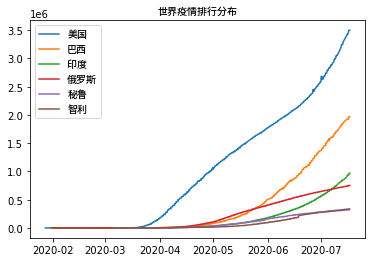

In [14]:
data_America = data_area_times[data_area_times['countryName'] == '美国']
data_Brazil = data_area_times[data_area_times['countryName'] == '巴西']
data_India = data_area_times[data_area_times['countryName'] == '印度']
data_Russia = data_area_times[data_area_times['countryName'] == '俄罗斯']
data_Peru = data_area_times[data_area_times['countryName'] == '秘鲁']
data_Chile = data_area_times[data_area_times['countryName'] == '智利']

timeindex = data_area_times.index
timeindex = timeindex.floor('D')  # 对于日期索引，只保留具体到哪一天
data_area_times.index = timeindex

timeseries = pd.DataFrame(data_America.index)
timeseries.index = data_America.index
data_America = pd.concat([timeseries, data_America], axis=1)
data_America.drop_duplicates(
    subset='updateTime', keep='first', inplace=True)  # 对美国数据进行处理，获得美国确诊人数的时间序列
data_America.drop('updateTime', axis=1, inplace=True)

timeseries = pd.DataFrame(data_Brazil.index)
timeseries.index = data_Brazil.index
data_Brazil = pd.concat([timeseries, data_Brazil], axis=1)
# 对巴西数据进行处理，获得巴西确诊人数的时间序列
data_Brazil.drop_duplicates(subset='updateTime', keep='first', inplace=True)
data_Brazil.drop('updateTime', axis=1, inplace=True)

timeseries = pd.DataFrame(data_India.index)
timeseries.index = data_India.index
data_India = pd.concat([timeseries, data_India], axis=1)
# 对印度数据进行处理，获得印度确诊人数的时间序列
data_India.drop_duplicates(subset='updateTime', keep='first', inplace=True)
data_India.drop('updateTime', axis=1, inplace=True)

timeseries = pd.DataFrame(data_Russia.index)
timeseries.index = data_Russia.index
data_Russia = pd.concat([timeseries, data_Russia], axis=1)
# 对俄罗斯数据进行处理，获得俄罗斯确诊人数的时间序列
data_Russia.drop_duplicates(subset='updateTime', keep='first', inplace=True)
data_Russia.drop('updateTime', axis=1, inplace=True)

timeseries = pd.DataFrame(data_Peru.index)
timeseries.index = data_Peru.index
data_Peru = pd.concat([timeseries, data_Peru], axis=1)
# 对秘鲁数据进行处理，获得秘鲁确诊人数的时间序列
data_Peru.drop_duplicates(subset='updateTime', keep='first', inplace=True)
data_Peru.drop('updateTime', axis=1, inplace=True)

timeseries = pd.DataFrame(data_Chile.index)
timeseries.index = data_Chile.index
data_Chile = pd.concat([timeseries, data_Chile], axis=1)
# 对智利数据进行处理，获得智利确诊人数的时间序列
data_Chile.drop_duplicates(subset='updateTime', keep='first', inplace=True)
data_Chile.drop('updateTime', axis=1, inplace=True)

plt.title("世界疫情排行分布", fontproperties=myfont)
plt.plot(data_America['province_confirmedCount'])
plt.plot(data_Brazil['province_confirmedCount'])
plt.plot(data_India['province_confirmedCount'])
plt.plot(data_Russia['province_confirmedCount'])
plt.plot(data_Peru['province_confirmedCount'])
plt.plot(data_Chile['province_confirmedCount'])
plt.legend(country, prop=myfont)

Building prefix dict from the default dictionary ...
Loading model from cache D:\TEMP\jieba.cache
Loading model cost 0.595 seconds.
Prefix dict has been built successfully.


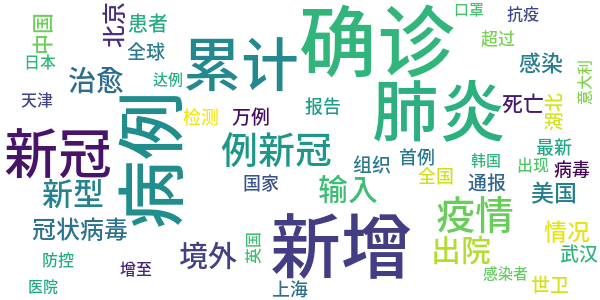

In [15]:
import jieba
import re
from wordcloud import WordCloud

def word_cut(x): return jieba.lcut(x)  # 进行结巴分词

news = []
reg = "[^\u4e00-\u9fa5]"
for i in data_news['title']:
    if re.sub(reg, '', i) != '':  # 去掉英文数字和标点等无关字符，仅保留中文词组
        news.append(re.sub(reg, '', i))  # 用news列表汇总处理后的新闻标题

words = []
counts = {}
for i in news:
    words.append(word_cut(i))  # 对所有新闻进行分词
for word in words:
    for a_word in word:
        if len(a_word) == 1:
            continue
        else:
            counts[a_word] = counts.get(a_word, 0)+1  # 用字典存储对应分词的词频
words_sort = list(counts.items())
words_sort.sort(key=lambda x: x[1], reverse=True)

newcloud = WordCloud(font_path="./NotoSansCJK.otf",
                     background_color="white", width=600, height=300, max_words=50)  # 生成词云
newcloud.generate_from_frequencies(counts)
image = newcloud.to_image()  # 转换成图片
image

Text(0, 0.5, 'Distortion')

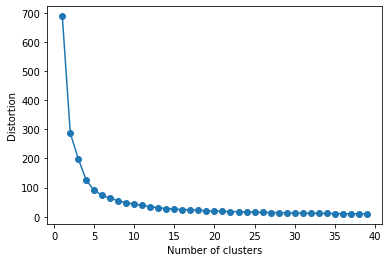

In [17]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

words = []

for i in news:
    words.append(word_cut(i))
model = Word2Vec(words, sg=0, size=300, window=5, min_count=5)  # 词向量进行训练
keys = model.wv.vocab.keys()  # 获取词汇列表
wordvector = []
for key in keys:
    wordvector.append(model[key])  # 对词汇列表里的所有的词向量进行整合

distortions = []
for i in range(1, 40):
    word_kmeans = KMeans(n_clusters=i,
                         init='k-means++',
                         n_init=10,
                         max_iter=300,
                         random_state=0)  # 分别聚成1-40类
    word_kmeans.fit(wordvector)
    distortions.append(word_kmeans.inertia_)  # 算出样本距离最近的聚类中心的距离总和

plt.plot(range(1, 40), distortions, marker='o')  # 绘图
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [19]:
word_kmeans = KMeans(n_clusters=10)  # 聚成10类
word_kmeans.fit(wordvector)

labels = word_kmeans.labels_

for num in range(0, 10):
    text = []
    for i in range(len(keys)):
        if labels[i] == num:
            text.append(list(keys)[i])  # 分别获得10类的聚类结果
    print(text)

['日', '西班牙', '报告', '升至', '达例', '重庆', '上海', '本地', '日本', '法国', '意大利', '天津', '时', '死亡', '单日', '广东', '通报', '无症状', '感染者', '韩国', '首例', '疑似病例', '增至', '黑龙江', '山东', '浙江']
['阿塞拜疆', '科威特', '塞内加尔', '白俄罗斯', '越南', '国际航班', '仪式', '引发', '好', '上调', '警惕', '多国', '营业', '下跌', '乌克兰', '一个月', '一周', '波兰', '保加利亚', '多州', '加大', '乌兹别克斯坦', '回升', '阿根廷', '住院', '严峻', '葡萄牙', '例均', '工作人员', '疾病', '大厅', '希腊', '两个', '筛查', '岗位', '工人', '任何', '冠', '有效', '一例', '北美', '危机', '传染病', '重开', '新西兰', '酒店', '总干事', '之下', '接待', '减少', '奥地利', '洛杉矶', '加纳', '阿曼', '地方', '加剧', '关键', '心理', '出席', '须', '帮助', '肯尼亚', '死于', '指南', '倍', '老人', '荷兰', '如何', '欧元', '级', '圭亚那', '巴基斯坦', '案例', '具备', '给', '吉尔吉斯斯坦', '挑战', '数超', '会议', '序列', '捷克', '名单', '近万', '统计', '外卖', '预测', '卫健委月', '比', '座', '印尼', '上海市', '吴尊友', '正在', '考试', '智利', '比赛', '区域', '进京', '量', '多数', '纳入', '明显', '海滩', '家中', '圈', '经济衰退', '厄瓜多尔', '卫健委日', '疾控', '主任', '超人', '化', '波', '尚', '条', '建', '教育部', '罚款', '蛋白质', '布', '针对', '全', '团结', '三个', '全员', '型', '辽宁大连', '份', '全体', '沈阳', '默哀', '水平', '变', '斯里兰卡', '纽约

Text(0.5, 1.0, '分行业GDP变化图')

<Figure size 432x288 with 0 Axes>

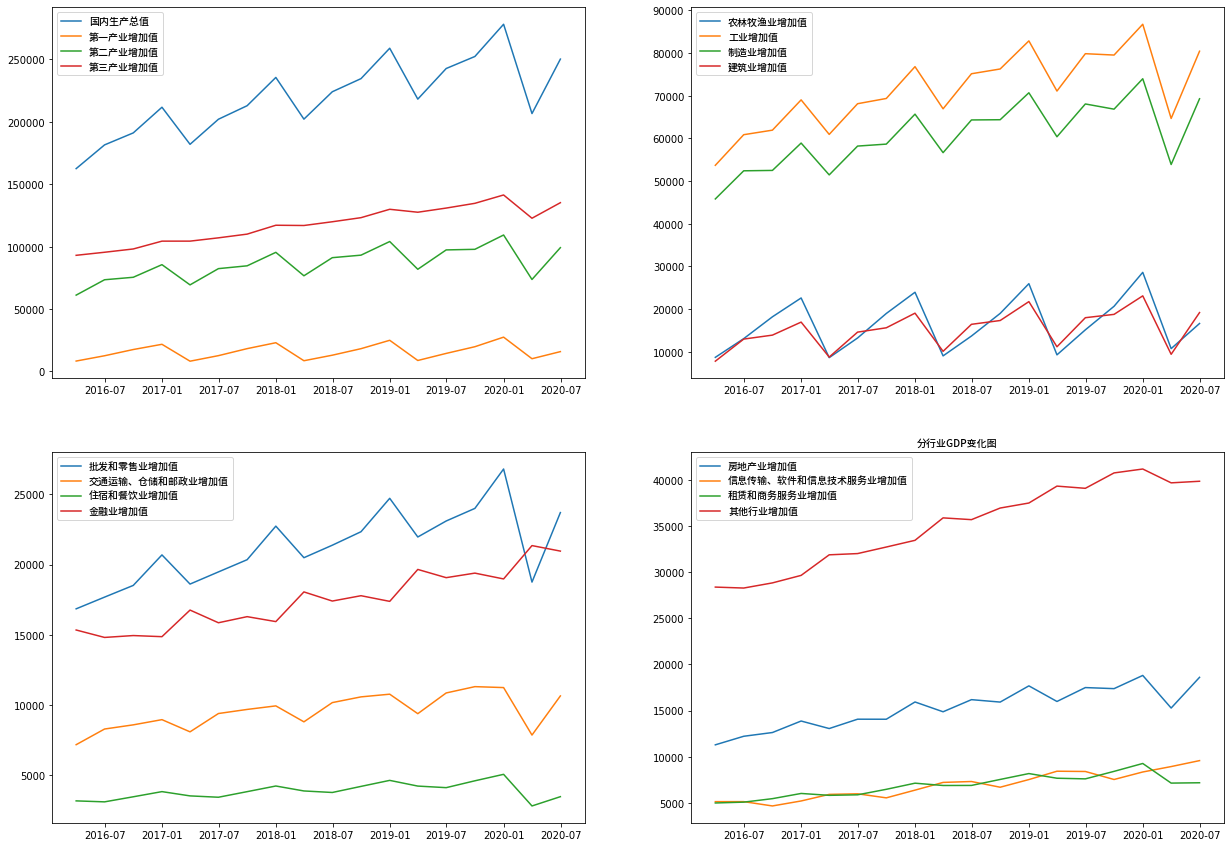

In [20]:
sum_GDP = ['国内生产总值', '第一产业增加值', '第二产业增加值', '第三产业增加值']
industry_GDP = ['农林牧渔业增加值', '工业增加值', '制造业增加值', '建筑业增加值']
industry2_GDP = ['批发和零售业增加值', '交通运输、仓储和邮政业增加值', '住宿和餐饮业增加值', '金融业增加值']
industry3_GDP = ['房地产业增加值', '信息传输、软件和信息技术服务业增加值',
                 '租赁和商务服务业增加值', '其他行业增加值']  # 对不同行业分四类来展现

fig = plt.figure()
fig, axes = plt.subplots(2, 2, figsize=(21, 15))  # 分别用四个子图来展现数据变化情况

axes[0][0].plot(data_economy[sum_GDP])
axes[0][0].legend(sum_GDP, prop=myfont)
axes[0][1].plot(data_economy[industry_GDP])
axes[0][1].legend(industry_GDP, prop=myfont)
axes[1][0].plot(data_economy[industry2_GDP])
axes[1][0].legend(industry2_GDP, prop=myfont)
axes[1][1].plot(data_economy[industry3_GDP])
axes[1][1].legend(industry3_GDP, prop=myfont)

plt.title('分行业GDP变化图', fontproperties=myfont)

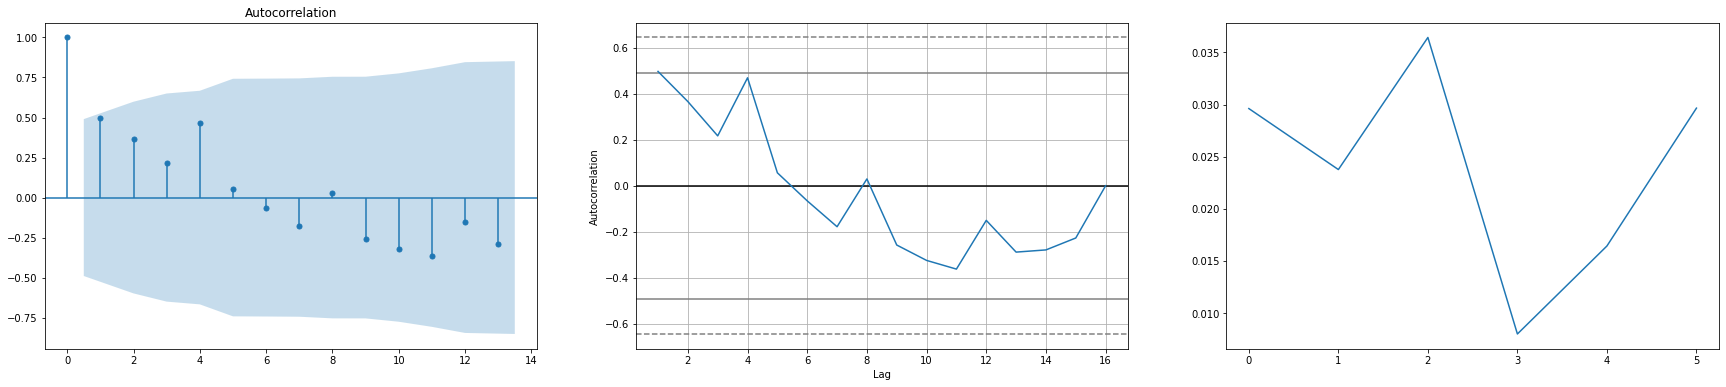

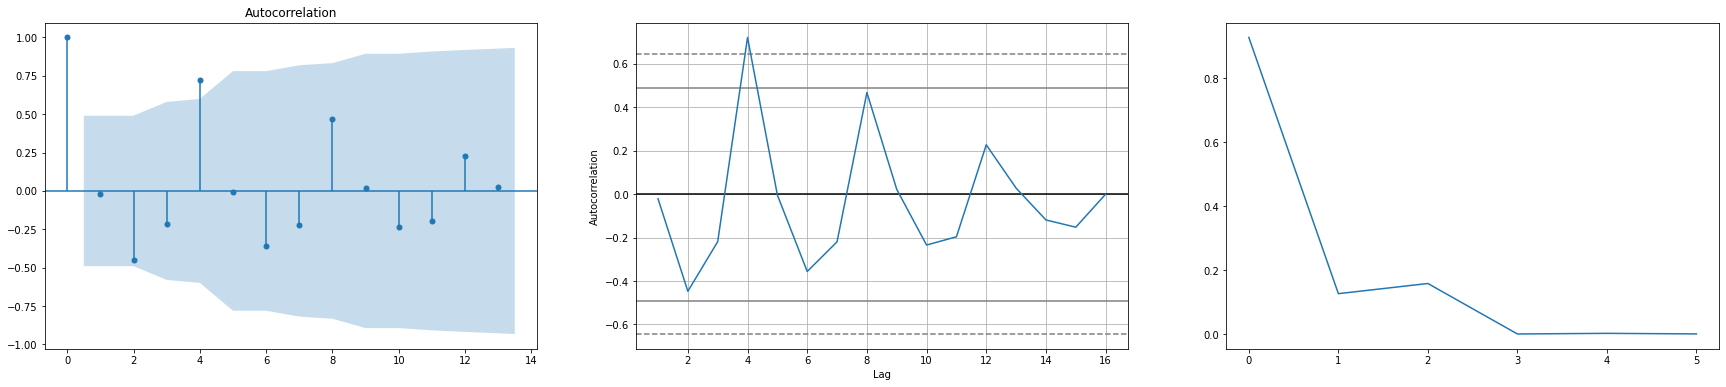

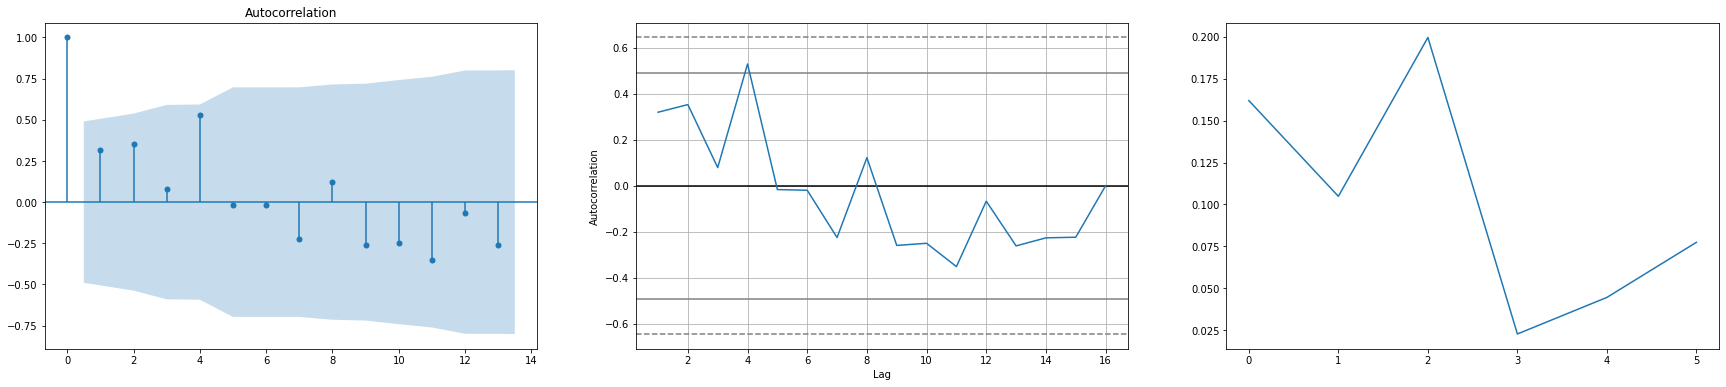

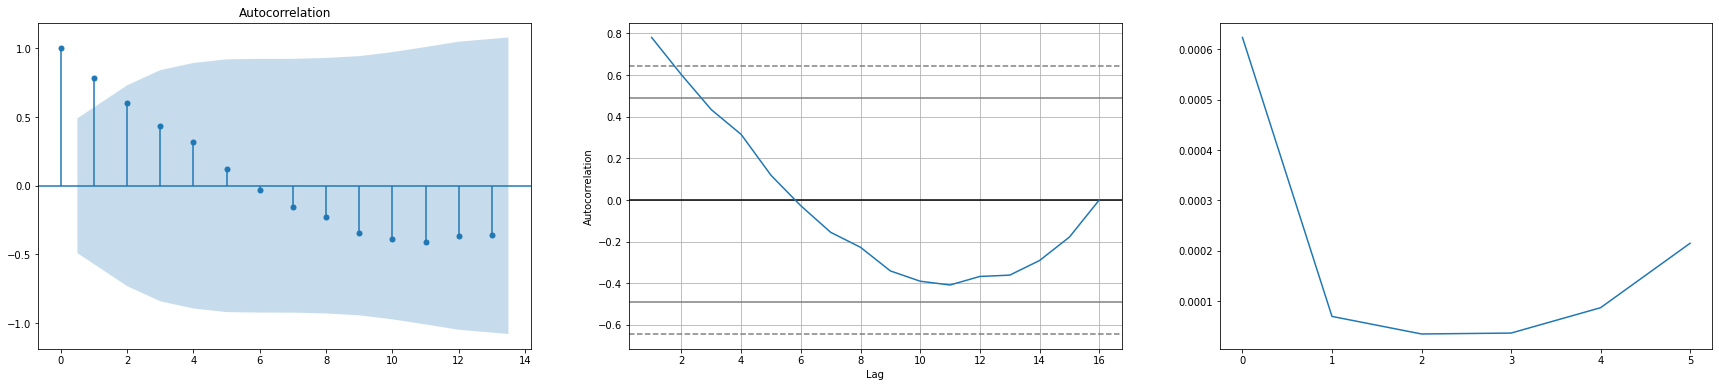

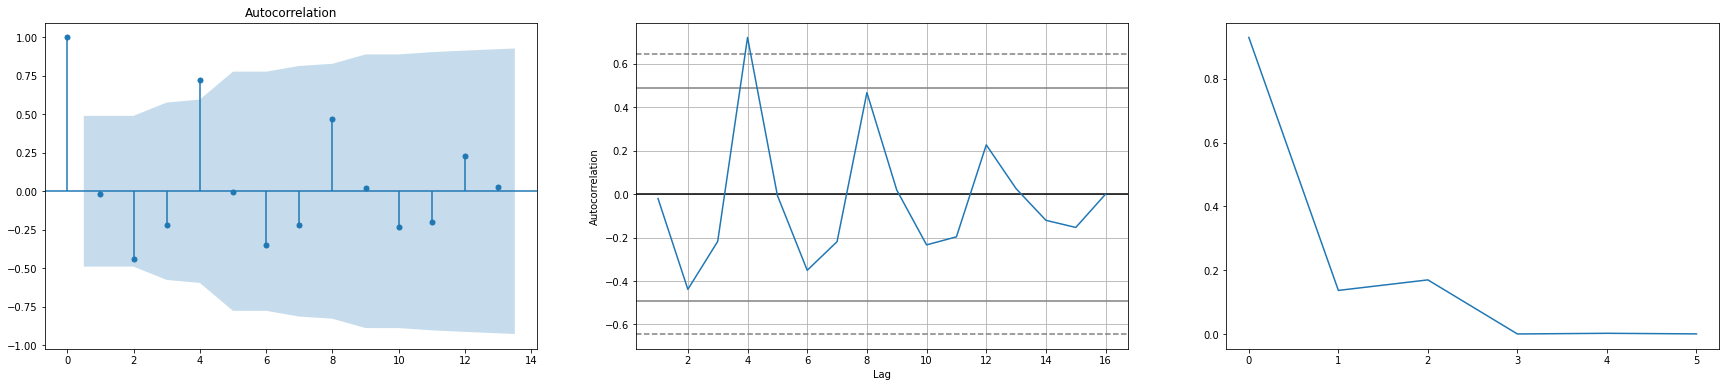

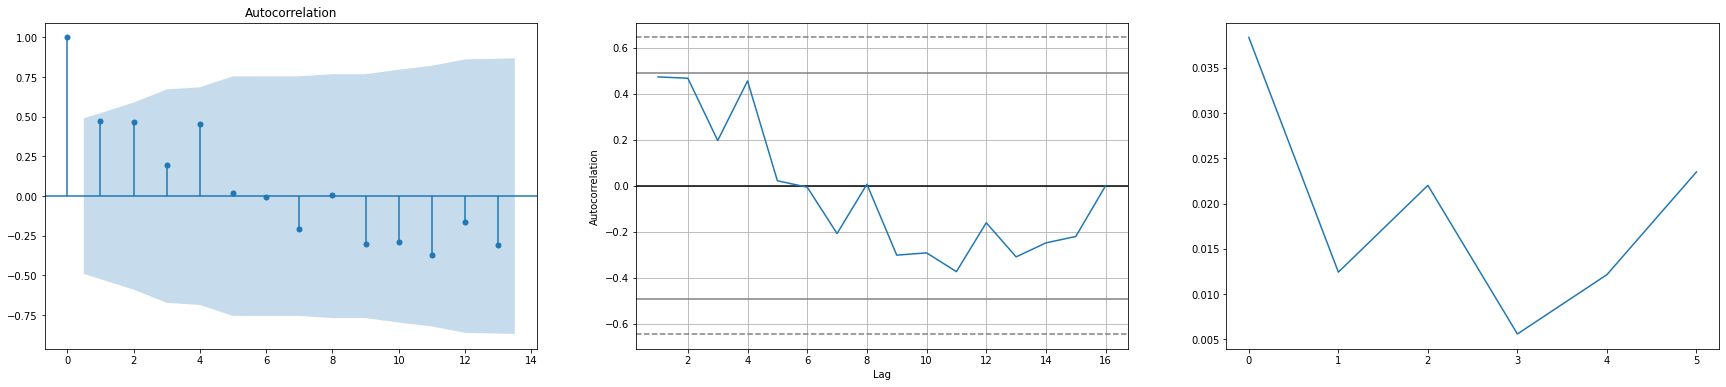

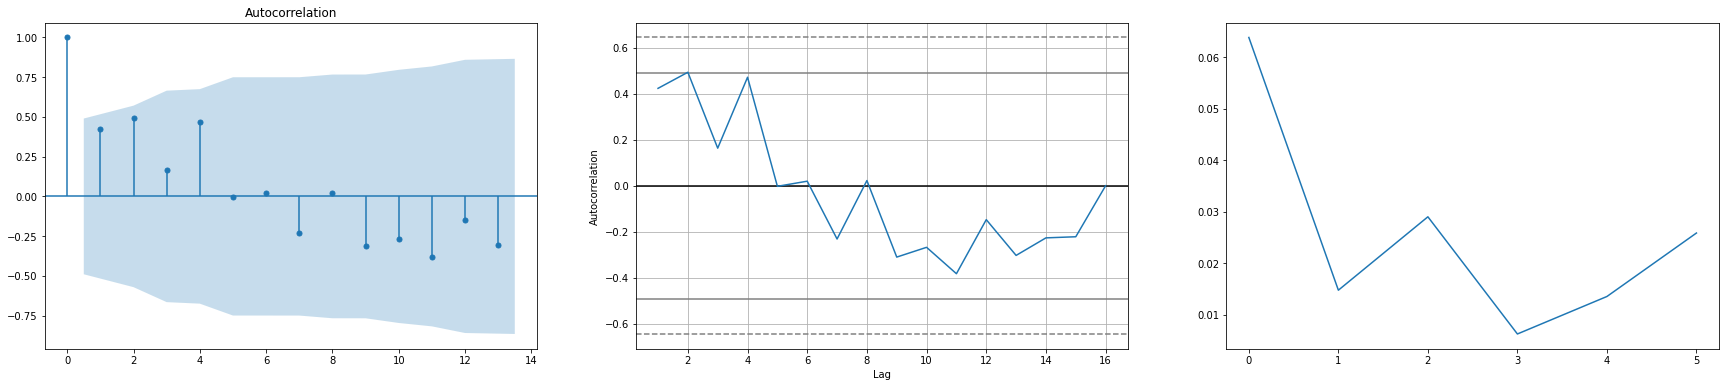

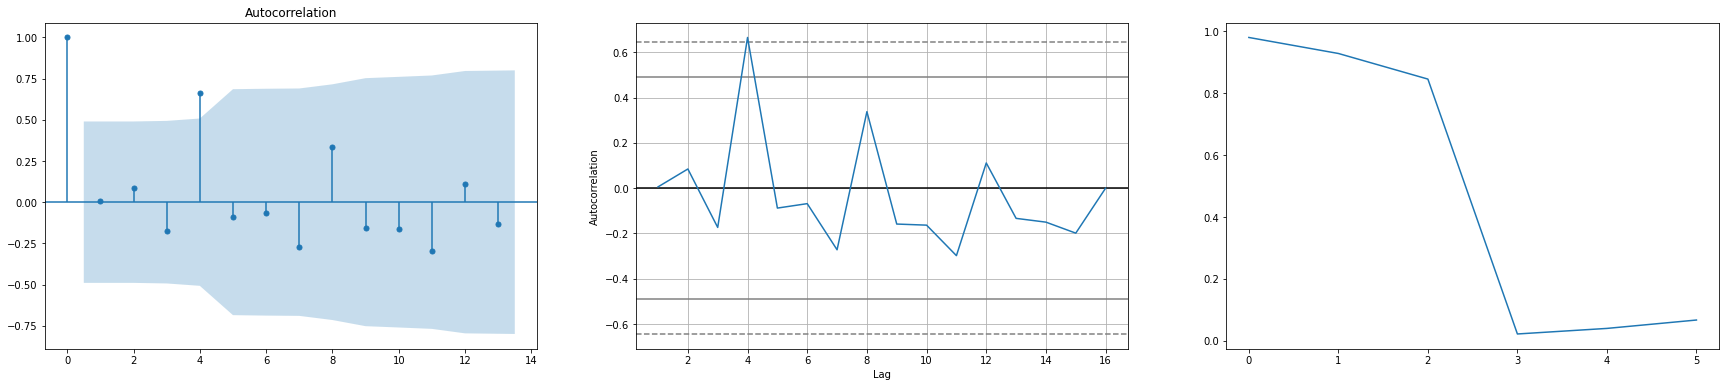

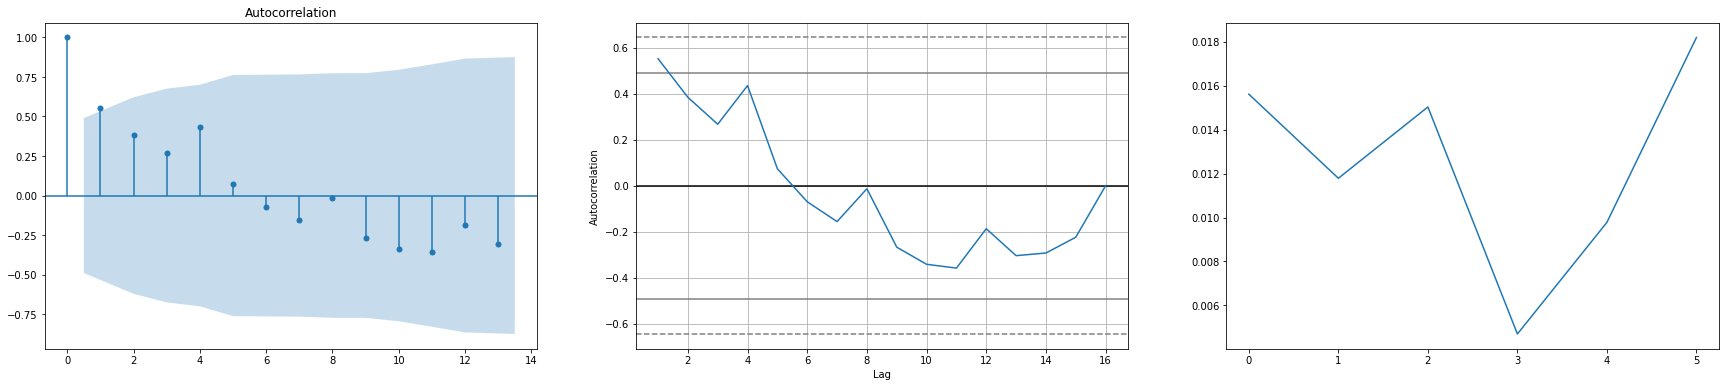

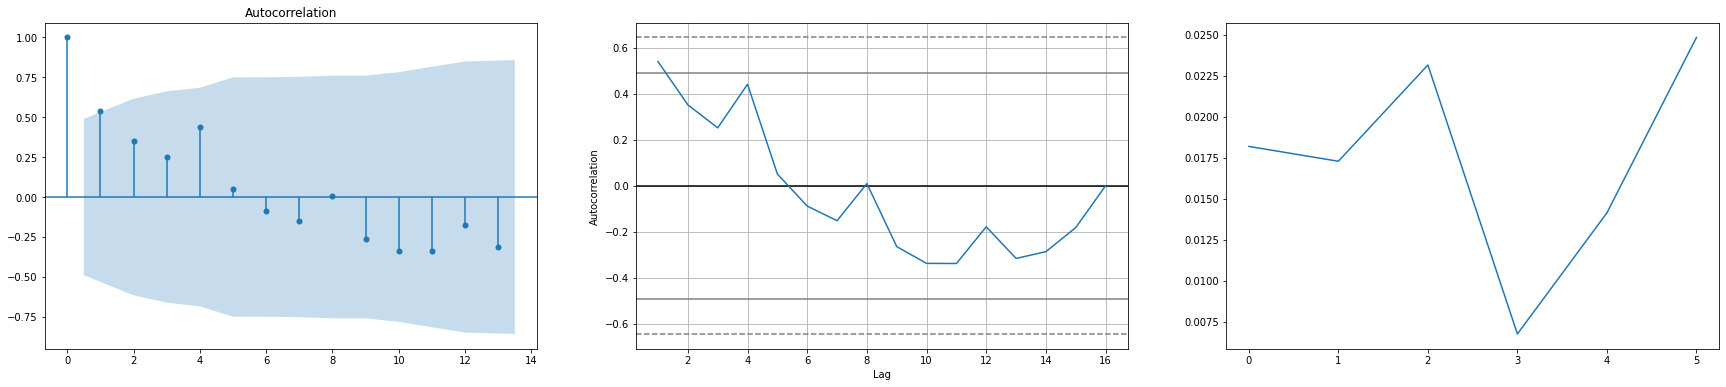

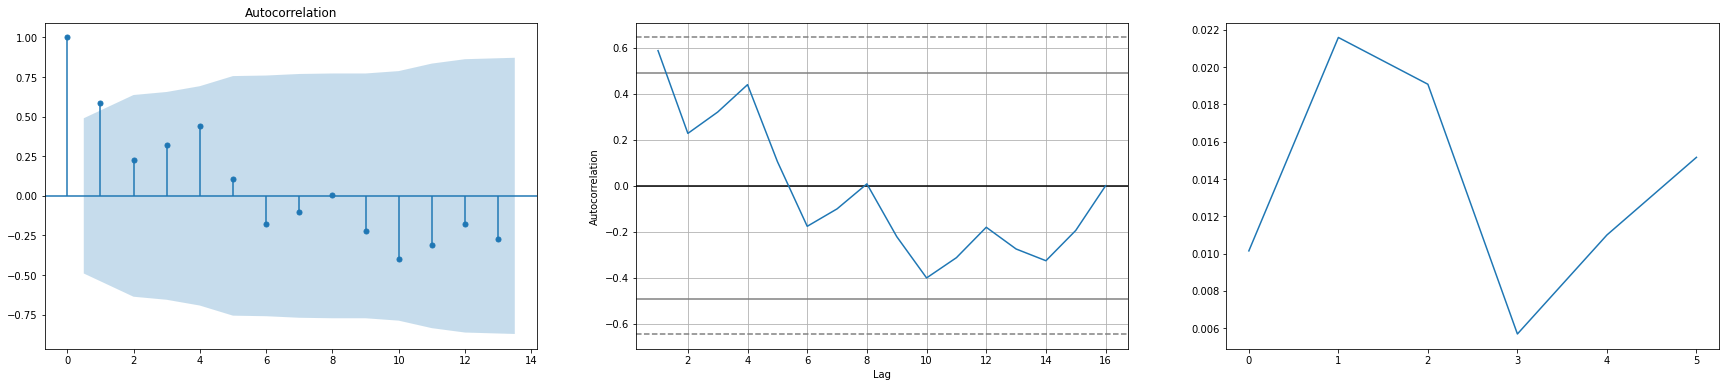

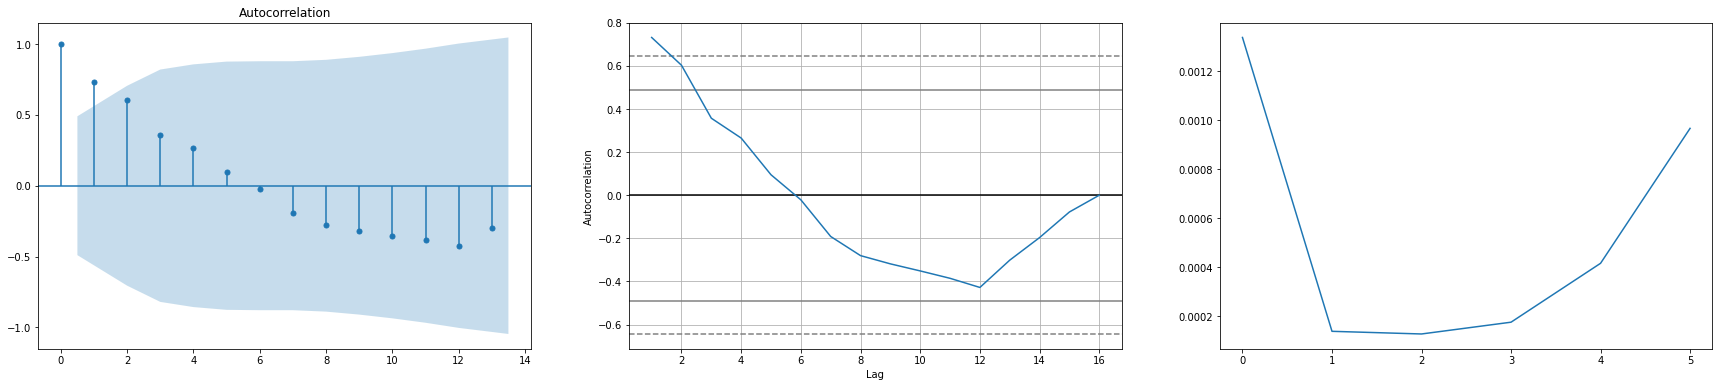

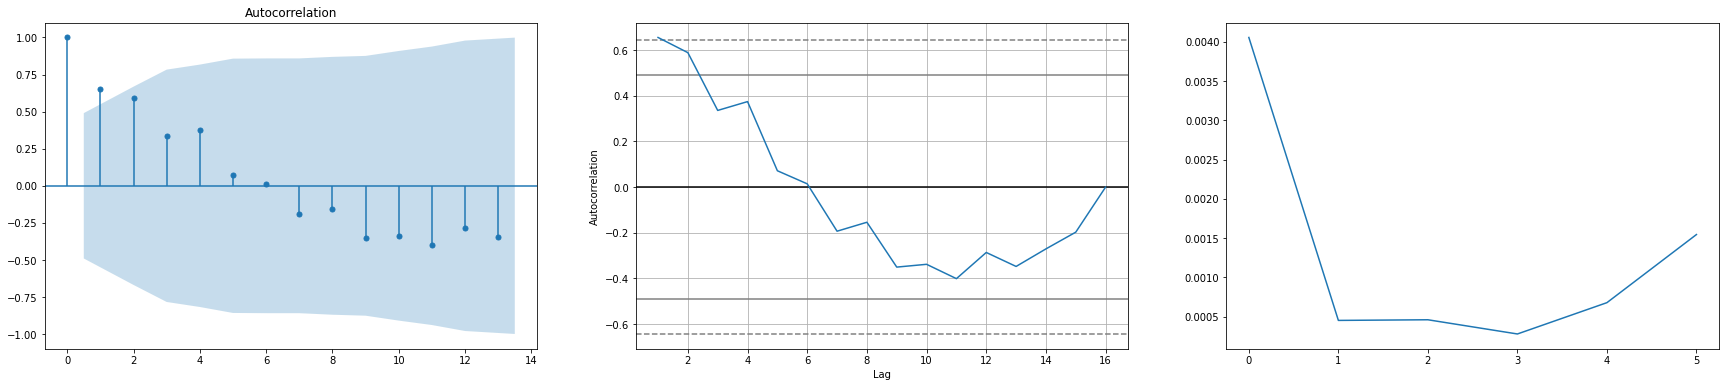

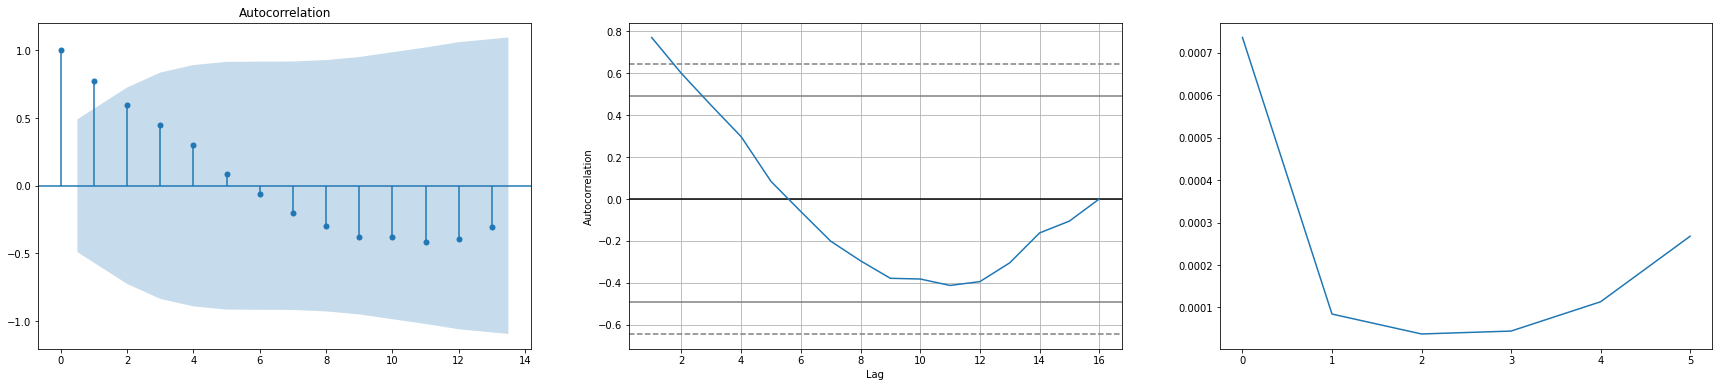

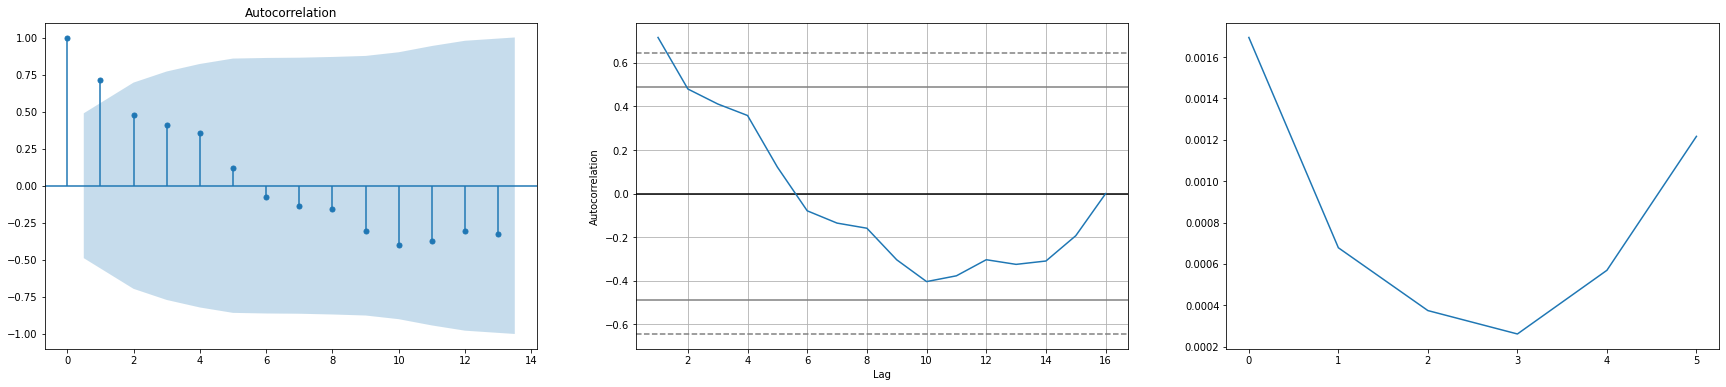

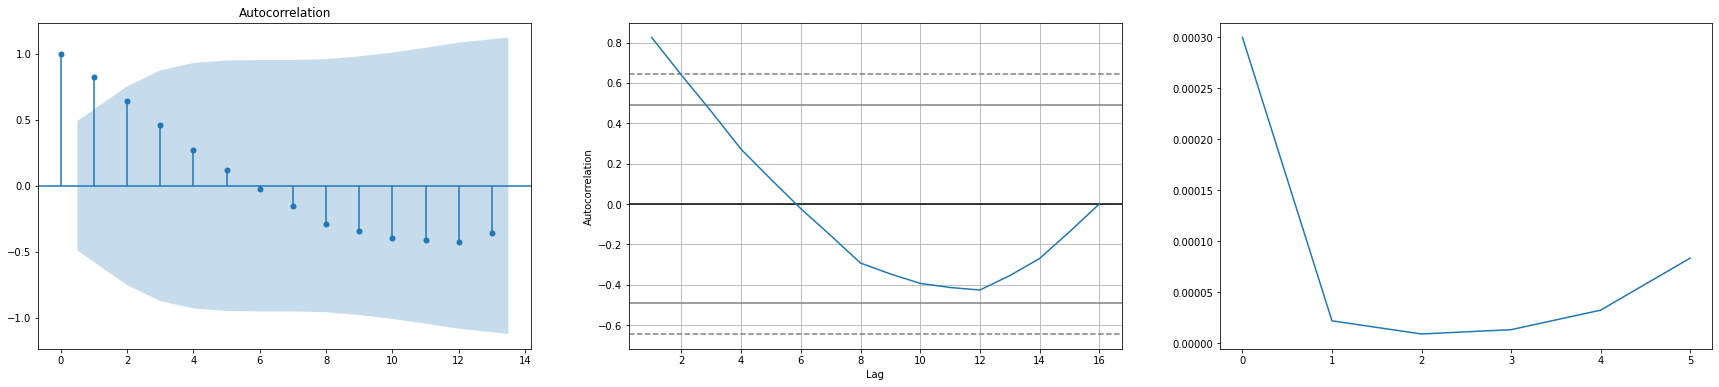

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
from statsmodels.sandbox.stats.diagnostic import acorr_ljungbox


GDP_type = ['国内生产总值', '第一产业增加值', '第二产业增加值', '第三产业增加值',
            '农林牧渔业增加值', '工业增加值', '制造业增加值', '建筑业增加值', '批发和零售业增加值',
            '交通运输、仓储和邮政业增加值', '住宿和餐饮业增加值', '金融业增加值',
            '房地产业增加值', '信息传输、软件和信息技术服务业增加值', '租赁和商务服务业增加值', '其他行业增加值']

for i in GDP_type:
    each_data = data_economy[i][:-2]
    plt.figure(figsize=(30, 6))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    LB2, P2 = acorr_ljungbox(each_data)  # 进行纯随机性检验
    plot_acf(each_data, ax=ax1)
    autocorrelation_plot(each_data, ax=ax2)  # 进行平稳性检验
    ax3.plot(P2)

In [22]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.tsa.stattools import arma_order_select_ic

warnings.filterwarnings('ignore')
data_arma = pd.DataFrame(data_economy['国内生产总值'][:-2])  # 选取疫情期前的16个季度进行建模
a, b = arma_order_select_ic(data_arma, ic='hqic')['hqic_min_order']
arma = ARMA(data_arma, order=(a, b)).fit()  # 使用ARMA建模
rate1 = list(data_economy['国内生产总值'][-2] /
             arma.forecast(steps=1)[0])  # 获得疫情期当季度的预测值
rate1  # 实际值与预测值的比率

[0.8273539514507257]

In [23]:
from pyecharts import options as opts
from pyecharts.charts import Liquid

c = (
    Liquid()
    .add("实际值/预测值", rate1, is_outline_show=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="第一季度国民生产总值实际值与预测值比例",
                                               pos_left="center"))
)
c.render_notebook()

In [24]:
warnings.filterwarnings('ignore')
data_arma = pd.DataFrame(data_economy['工业增加值'][:-2])
a, b = arma_order_select_ic(data_arma, ic='hqic')['hqic_min_order']
arma = ARMA(data_arma, order=(a, b)).fit()
rate2 = list(data_economy['工业增加值'][-2]/arma.forecast(steps=1)[0])
c = (
    Liquid()
    .add("实际值/预测值", rate2, is_outline_show=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="工业增加值比例", pos_left="center"))
)
c.render_notebook()

In [25]:
warnings.filterwarnings('ignore')
data_arma = pd.DataFrame(data_economy['制造业增加值'][:-2])
a, b = arma_order_select_ic(data_arma, ic='hqic')['hqic_min_order']
arma = ARMA(data_arma, order=(a, b)).fit()
rate3 = list(data_economy['制造业增加值'][-2]/arma.forecast(steps=1)[0])
c = (
    Liquid()
    .add("实际值/预测值", rate3, is_outline_show=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="制造业增加值", pos_left="center"))
)
c.render_notebook()

In [26]:
data_arma = pd.DataFrame(data_economy['批发和零售业增加值'][:-2])
a, b = arma_order_select_ic(data_arma, ic='hqic')['hqic_min_order']
arma = ARMA(data_arma, order=(a, b)).fit()
rate4 = list(data_economy['批发和零售业增加值'][-2]/arma.forecast(steps=1)[0])
c = (
    Liquid()
    .add("实际值/预测值", rate4, is_outline_show=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="批发和零售业增加值", pos_left="center"))
)
c.render_notebook()

In [27]:
data_arma = pd.DataFrame(data_economy['信息传输、软件和信息技术服务业增加值'][:-2])
a, b = arma_order_select_ic(data_arma, ic='hqic')['hqic_min_order']
arma = ARMA(data_arma, order=(a, b)).fit()
rate = list(data_economy['信息传输、软件和信息技术服务业增加值'][-2]/arma.forecast(steps=1)[0])
c = (
    Liquid()
    .add("实际值/预测值", rate, is_outline_show=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="信息传输、软件和信息技术服务业增加值",
                                               pos_left="center"))
)
c.render_notebook()

In [28]:
data_arma = pd.DataFrame(data_economy['金融业增加值'][:-2])
a, b = arma_order_select_ic(data_arma, ic='hqic')['hqic_min_order']
arma = ARMA(data_arma, order=(a, b)).fit()
rate = list(data_economy['金融业增加值'][-2]/arma.forecast(steps=1)[0])
c = (
    Liquid()
    .add("实际值/预测值", rate, is_outline_show=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="金融业增加值", pos_left="center"))
)
c.render_notebook()